In [1]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

import pandas as pd

YEAR = 2013
GDP_INDICATOR = 'NY.GDP.MKTP.CD'
gdpReset = pd.read_csv('WB GDP 2013.csv')

LIFE_INDICATOR = 'SP.DYN.LE00.IN'
lifeReset = pd.read_csv('WB LE 2013.csv')
lifeReset.head()

,country,year,SP.DYN.LE00.IN
0,Arab World,2013,70.631305
1,Caribbean small states,2013,71.901964
2,Central Europe and the Baltics,2013,76.127583
3,East Asia & Pacific (all income levels),2013,74.604619
4,East Asia & Pacific (developing only),2013,73.657617


In [2]:
gdpCountries = gdpReset[34:].dropna()
lifeCountries = lifeReset[34:].dropna()

In [3]:
def roundToMillions (value):
    return round(value / 1000000)

def usdToGBP (usd):
    return usd / 1.564768

GDP = 'GDP (£m)'
gdpCountries[GDP] = gdpCountries[GDP_INDICATOR].apply(usdToGBP).apply(roundToMillions)
gdpCountries.head()

,country,year,NY.GDP.MKTP.CD,GDP (£m)
34,Afghanistan,2013,2.045894e+10,13075
35,Albania,2013,1.278103e+10,8168
36,Algeria,2013,2.097035e+11,134016
38,Andorra,2013,3.249101e+09,2076
39,Angola,2013,1.383568e+11,88420


In [4]:
COUNTRY = 'country'
headings = [COUNTRY, GDP]
gdpClean = gdpCountries[headings]
gdpClean.head()

,country,GDP (£m)
34,Afghanistan,13075
35,Albania,8168
36,Algeria,134016
38,Andorra,2076
39,Angola,88420


In [5]:
LIFE = 'Life expectancy (years)'
lifeCountries[LIFE] = lifeCountries[LIFE_INDICATOR].apply(round)
headings = [COUNTRY, LIFE]
lifeClean = lifeCountries[headings]
lifeClean.head()

,country,Life expectancy (years)
34,Afghanistan,60
35,Albania,78
36,Algeria,75
39,Angola,52
40,Antigua and Barbuda,76


In [7]:
gdpVsLife = pd.merge(gdpClean, lifeClean, on=COUNTRY, how='inner')
gdpVsLife.head()

,country,GDP (£m),Life expectancy (years)
0,Afghanistan,13075,60
1,Albania,8168,78
2,Algeria,134016,75
3,Angola,88420,52
4,Antigua and Barbuda,767,76


In [8]:
from scipy.stats import spearmanr

gdpColumn = gdpVsLife[GDP]
lifeColumn = gdpVsLife[LIFE]
(correlation, pValue) = spearmanr(gdpColumn, lifeColumn)
print('The correlation is', correlation)
if pValue < 0.05:
    print('It is statistically significant.')
else:
    print('It is not statistically significant.')

The correlation is 0.5010232389671027
It is statistically significant.


<AxesSubplot:xlabel='GDP (£m)', ylabel='Life expectancy (years)'>

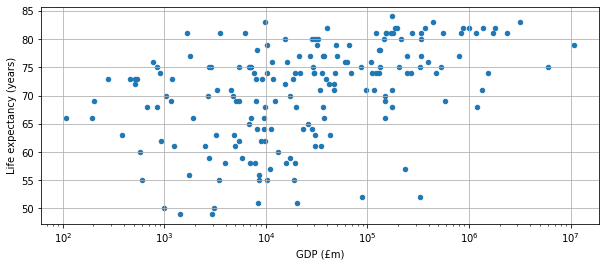

In [9]:
%matplotlib inline
gdpVsLife.plot(x=GDP, y=LIFE, kind='scatter', grid=True, logx=True, figsize=(10, 4))

In [10]:
gdpVsLife.sort_values(GDP).head(10)

,country,GDP (£m),Life expectancy (years)
87,Kiribati,108,66
141,Sao Tome and Principe,195,66
111,"Micronesia, Fed. Sts.",202,69
168,Tonga,277,73
37,Comoros,383,63
157,St. Vincent and the Grenadines,461,73
140,Samoa,509,73
180,Vanuatu,512,72
65,Grenada,538,73
60,"Gambia, The",578,60


In [11]:
gdpVsLife.sort_values(LIFE).head(10)

,country,GDP (£m),Life expectancy (years)
95,Lesotho,1418,49
160,Swaziland,2916,49
32,Central African Republic,983,50
146,Sierra Leone,3092,50
33,Chad,8276,51
41,Cote d'Ivoire,19998,51
3,Angola,88420,52
124,Nigeria,329100,52
30,Cameroon,18896,55
153,South Sudan,8473,55


In [12]:
GDP = 'GDP (£)'
gdpCountries[GDP] = gdpCountries[GDP_INDICATOR].apply(usdToGBP) 
headings = [COUNTRY, GDP]                                      
gdpClean = gdpCountries[headings]  
display(gdpClean.head())

,country,GDP (£)
34,Afghanistan,1.307474e+10
35,Albania,8.168003e+09
36,Algeria,1.340157e+11
38,Andorra,2.076410e+09
39,Angola,8.842001e+10


In [14]:
POP = 'SP.POP.TOTL' 
popReset = pd.read_csv('WB POP 2013.csv')

popCountries = popReset[34:].dropna() 
headings = [COUNTRY, POP]                                       
popClean = popCountries[headings]
popClean.head()

,country,SP.POP.TOTL
34,Afghanistan,30682500.0
35,Albania,2897366.0
36,Algeria,38186135.0
37,American Samoa,55302.0
38,Andorra,75902.0


In [16]:
gdpVsPop = pd.merge(gdpClean, popClean, on=COUNTRY, how='inner')
gdpVsPop.head()

,country,GDP (£),SP.POP.TOTL
0,Afghanistan,1.307474e+10,30682500.0
1,Albania,8.168003e+09,2897366.0
2,Algeria,1.340157e+11,38186135.0
3,Andorra,2.076410e+09,75902.0
4,Angola,8.842001e+10,23448202.0


In [17]:
def roundTo2dp (value):
    return round(value, 2) 

GDPPC = 'GDP per capita (£)'

gdpVsPop[GDPPC] = gdpVsPop[GDP] / gdpVsPop[POP]
gdpVsPop[GDPPC] = gdpVsPop[GDPPC].apply(roundTo2dp) 
headings = [COUNTRY, GDPPC]                                   
gdppc = gdpVsPop[headings]   
gdppc.head()

,country,GDP per capita (£)
0,Afghanistan,426.13
1,Albania,2819.11
2,Algeria,3509.54
3,Andorra,27356.47
4,Angola,3770.87


In [22]:
gdppcVsLife = pd.merge(gdppc, lifeClean, on=COUNTRY, how='inner')
gdppcVsLife

,country,GDP per capita (£),Life expectancy (years)
0,Afghanistan,426.13,60
1,Albania,2819.11,78
2,Algeria,3509.54,75
3,Angola,3770.87,52
4,Antigua and Barbuda,8526.56,76
...,...,...,...
181,Vietnam,1219.76,76
182,West Bank and Gaza,1911.81,73
183,"Yemen, Rep.",899.91,64
184,Zambia,1124.25,59


<AxesSubplot:xlabel='GDP per capita (£)', ylabel='Life expectancy (years)'>

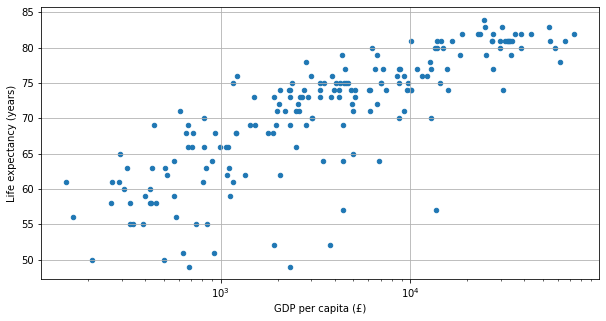

In [20]:
gdppcVsLife.plot(x=GDPPC, y=LIFE, kind='scatter', grid=True, logx=True, figsize=(10, 5))

In [21]:
from scipy.stats import spearmanr

gdppcColumn = gdppcVsLife[GDPPC]
lifeColumn = gdppcVsLife[LIFE]
(correlation, pValue) = spearmanr(gdppcColumn, lifeColumn)
print('The correlation using Spearman ranking is', correlation)
print('The p-value is', pValue)
if pValue < 0.05:
    print('It is statistically significant.')
else:
    print('It is not statistically significant.')

The correlation using Spearman ranking is 0.8502554597715132
The p-value is 3.598395374072683e-53
It is statistically significant.
